<a href="https://colab.research.google.com/github/rgrAndrade/Desafio/blob/main/desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
uri = "https://raw.githubusercontent.com/rgrAndrade/Desafio/main/dados/psel%20-%20data.csv"
dados = pd.read_csv(uri)
dados.head( )

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
0,2019-01-01,349184,0,4693,0,46739
1,2019-01-02,867328,0,8501,0,83129
2,2019-01-03,758590,0,9375,0,86067
3,2019-01-04,688873,0,8405,0,69363
4,2019-01-05,441760,0,6136,0,56183


In [12]:
# Análise Estatística do Conjunto de Dados


dados.describe()


,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
count,6.390000e+02,639.000000,639.000000,639.000000,639.000000
mean,1.623891e+06,528.350548,19039.140845,1439.848200,101610.485133
std,1.160581e+06,1201.781347,13677.729723,3369.872063,37240.234152
min,3.208500e+04,0.000000,3557.000000,0.000000,26298.000000
25%,8.073420e+05,0.000000,11013.000000,0.000000,77727.000000
50%,1.263161e+06,0.000000,16069.000000,0.000000,96104.000000
75%,2.232770e+06,0.000000,22606.500000,0.000000,117586.500000
max,1.226684e+07,5586.000000,188955.000000,13059.000000,369989.000000


In [8]:
#Informação dos tipos das variáveis

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   data             639 non-null    object
 1   receita          639 non-null    int64 
 2   transacoes_blog  639 non-null    int64 
 3   transacoes_site  639 non-null    int64 
 4   usuarios_blog    639 non-null    int64 
 5   usuarios_site    639 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 30.1+ KB


In [15]:
#Correlação entre as Variáveis 

correlacao = dados.corr()
correlacao

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
receita,1.000000,0.531721,0.812644,0.518040,0.711175
transacoes_blog,0.531721,1.000000,0.068880,0.893342,0.162275
transacoes_site,0.812644,0.068880,1.000000,0.054284,0.819962
usuarios_blog,0.518040,0.893342,0.054284,1.000000,0.151805
usuarios_site,0.711175,0.162275,0.819962,0.151805,1.000000


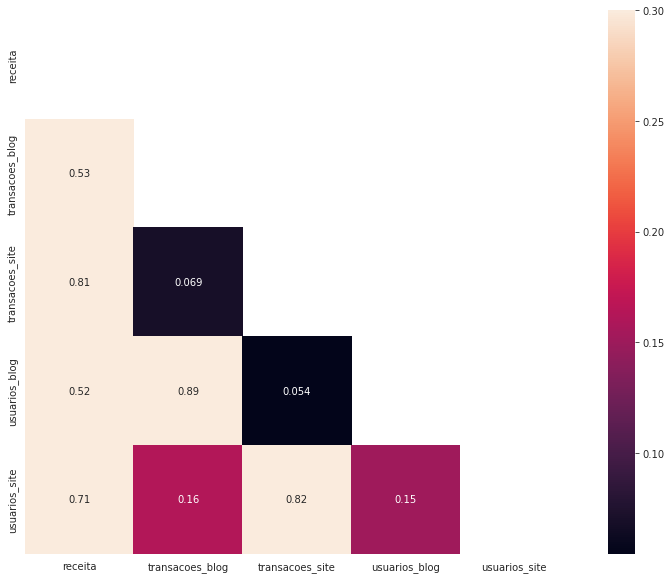

In [20]:


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(correlacao, mask=mask, vmax=.3, square=True, annot=True)